In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
 
import pandas as pd
import numpy as np
 

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Scott\Documents\ccm\ML\Project1\winequality-comb.csv")

In [3]:
df.describe()
#1,599 reds indicated by a 1 in wine color feature. 4,898 white incicated by a 0 in wine color feature

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
list(df)

['wine_color',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
#Fix the data types
df["wine_color"] = df["wine_color"].apply(lambda x: int(x))
df["fixed acidity"] = df["fixed acidity"].apply(lambda x: float(x))
df["volatile acidity"] = df["volatile acidity"].apply(lambda x: float(x))
df["citric acid"] = df["citric acid"].apply(lambda x: float(x))
df["residual sugar"] = df["residual sugar"].apply(lambda x: float(x))
df["chlorides"] = df["chlorides"].apply(lambda x: float(x))
df["free sulfur dioxide"] = df["free sulfur dioxide"].apply(lambda x: float(x))
df["total sulfur dioxide"] = df["total sulfur dioxide"].apply(lambda x: float(x))
df["density"] = df["density"].apply(lambda x: float(x))
df["pH"] = df["pH"].apply(lambda x: float(x))
df["sulphates"] = df["sulphates"].apply(lambda x: float(x))
df["alcohol"] = df["alcohol"].apply(lambda x: float(x))
df["quality"] = df["quality"].apply(lambda x: float(x))

In [6]:
df.head()

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [7]:
df.corr()[["wine_color"]]

,wine_color
wine_color,1.000000
fixed acidity,0.486740
volatile acidity,0.653036
citric acid,-0.187397
residual sugar,-0.348821
chlorides,0.512678
free sulfur dioxide,-0.471644
total sulfur dioxide,-0.700357
density,0.390645
pH,0.329129


In [8]:
df.wine_color.unique()

array([1, 0], dtype=int64)

<Figure size 432x288 with 0 Axes>

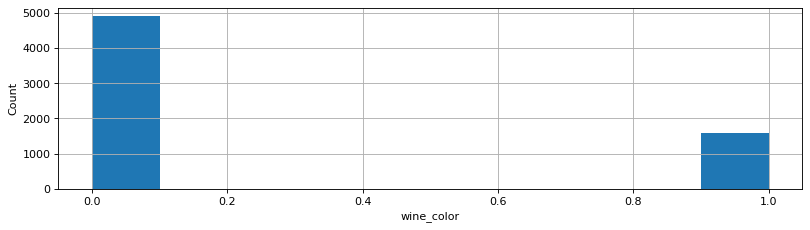

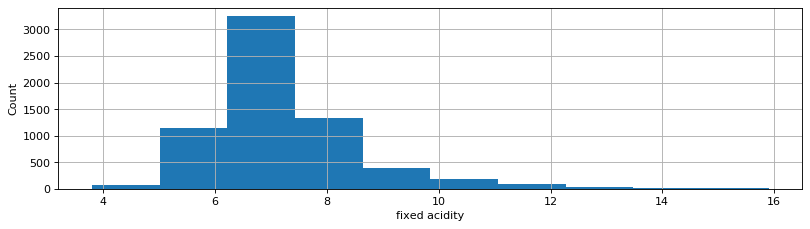

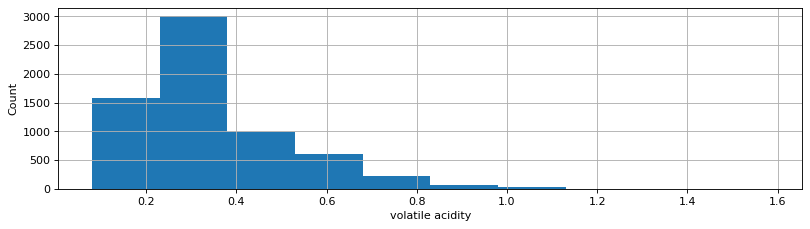

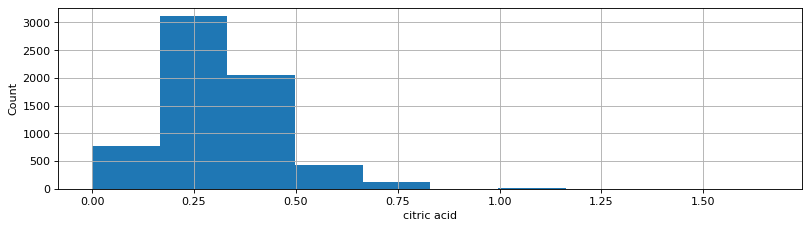

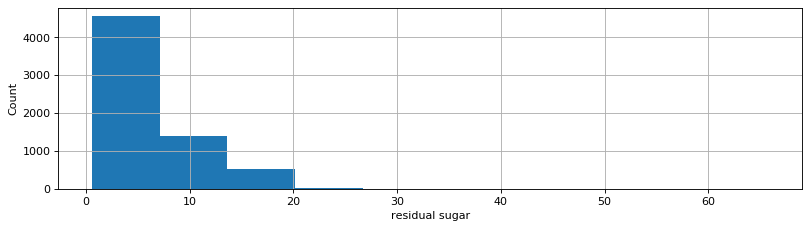

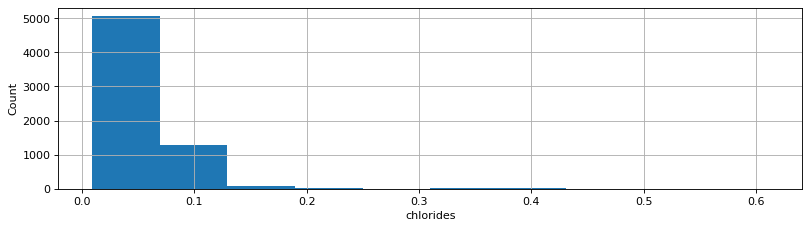

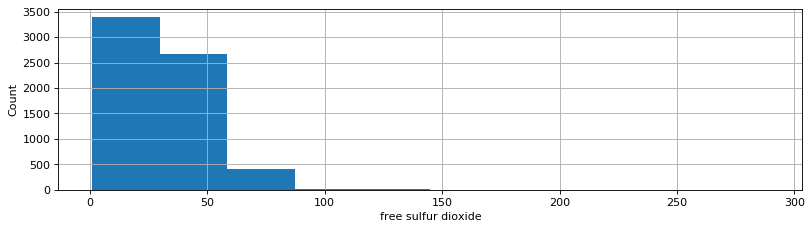

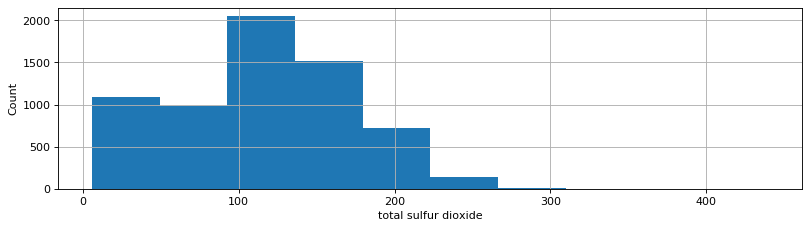

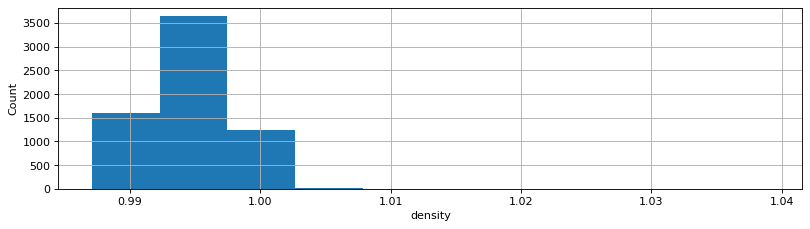

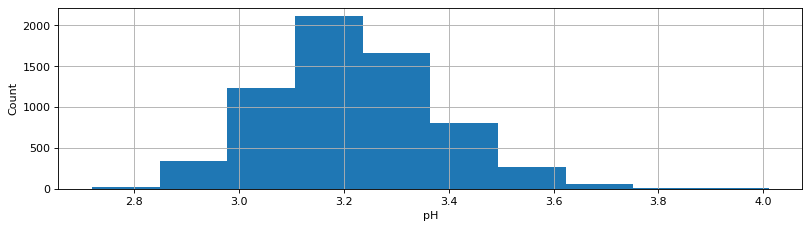

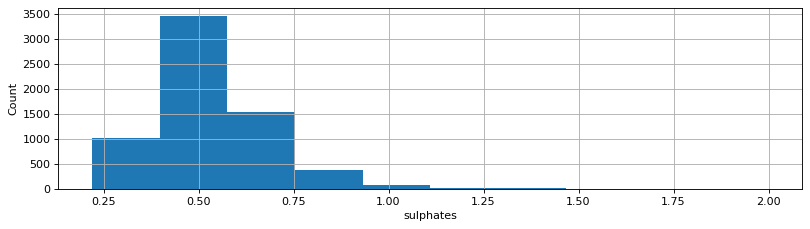

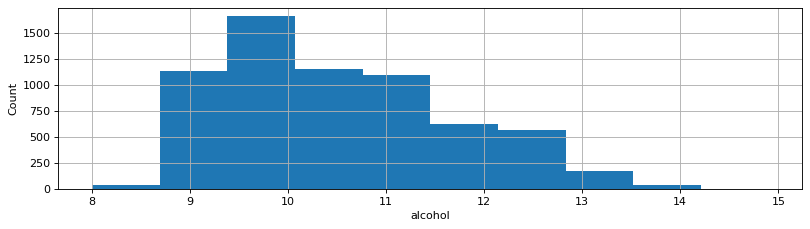

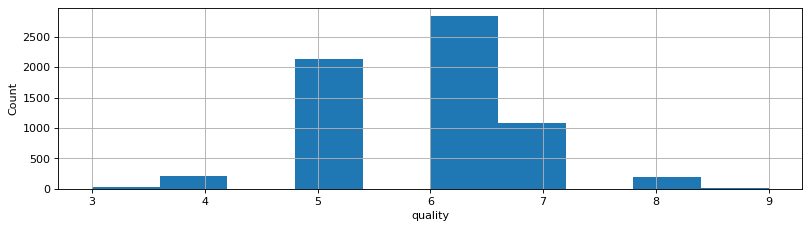

In [9]:
#plot histograms of features
plt.clf()
for var in list(df.columns):
    plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Count')
    plt.xlabel(var)
    

    df[var].hist(bins=10)
    plt.show()

In [10]:
# Review correlation matrix
df.corr()

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine_color,1.000000,0.486740,0.653036,-0.187397,-0.348821,0.512678,-0.471644,-0.700357,0.390645,0.329129,0.487218,-0.032970,-0.119323
fixed acidity,0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,-0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


<Figure size 432x288 with 0 Axes>

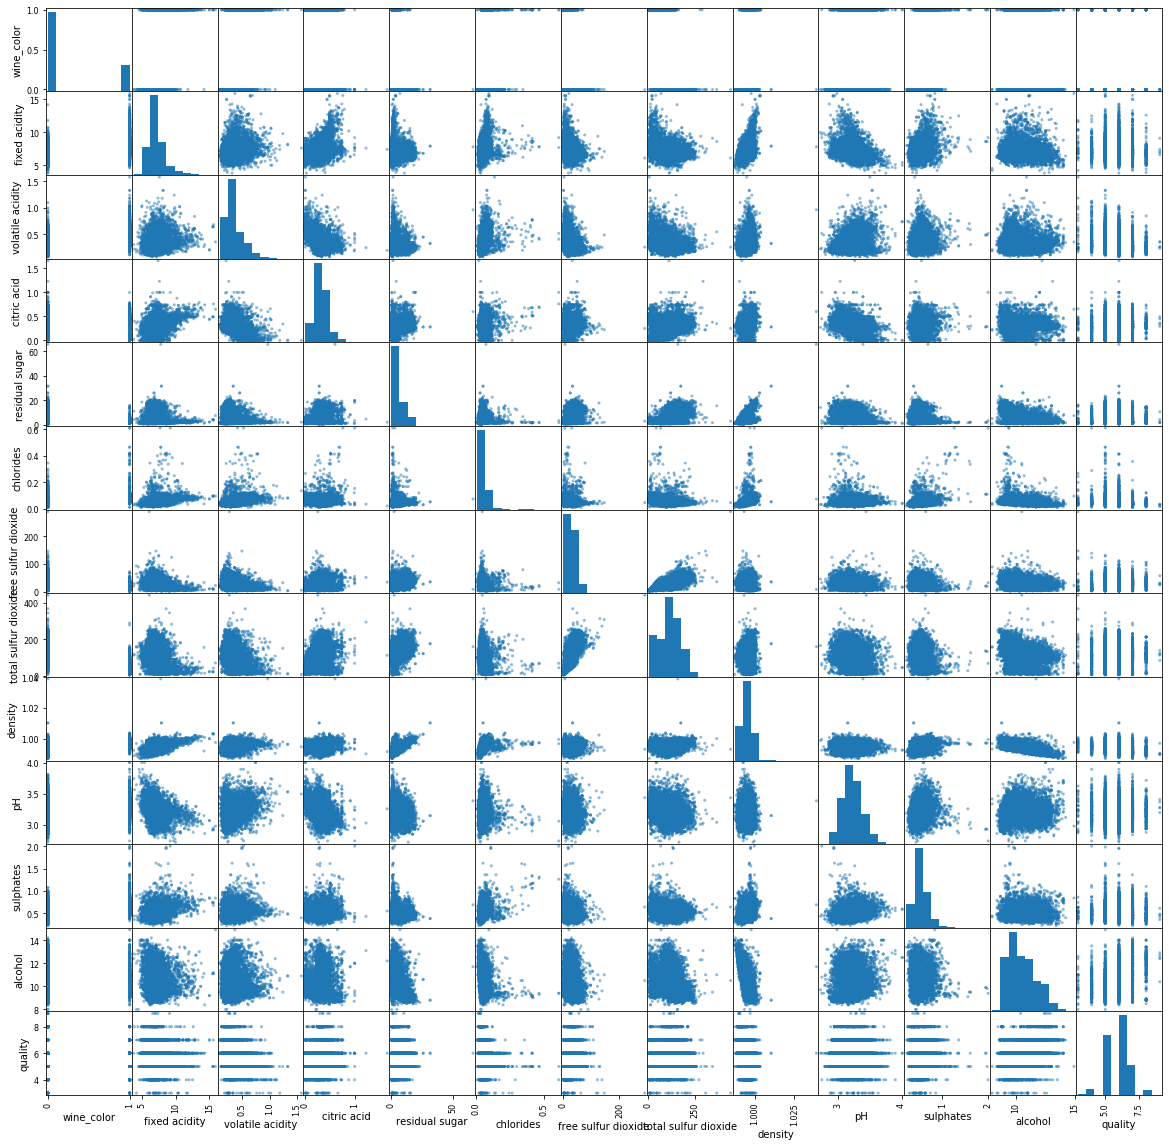

In [11]:
#plot scatter plot of features
plt.clf()
plt.rcParams["figure.figsize"] = (20,20)
pd.plotting.scatter_matrix(df)

plt.show()

In [12]:
# use standard scaler and fit_transform
scaled = StandardScaler().fit_transform(df[['wine_color','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                                          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                                          'pH', 'sulphates','alcohol', 'quality']])
df_scaled = pd.DataFrame(scaled, columns = ['wine_color','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                                          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                                          'pH', 'sulphates','alcohol','quality' ])

# Set X and y values
X = df_scaled[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 
               'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality']]
y = df['wine_color']

In [13]:
# Create a Principal Component Analysis instance: pca
pca = PCA()

In [14]:
# Fit pca to 'df-scaled'
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

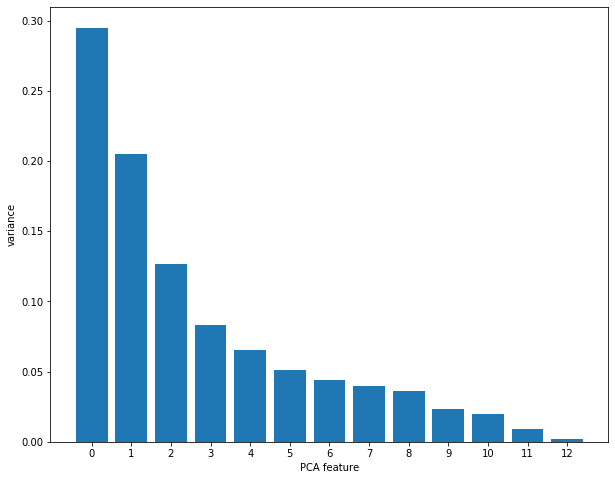

In [15]:
# Plot the explained variances
features = range(0, pca.n_components_)
plt.figure(figsize=(10,8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [16]:
pca.explained_variance_ratio_

array([0.29492412, 0.20484445, 0.12627433, 0.08311596, 0.06536559,
       0.05083677, 0.04407412, 0.04007519, 0.03618948, 0.02352702,
       0.01975193, 0.00917425, 0.00184679])

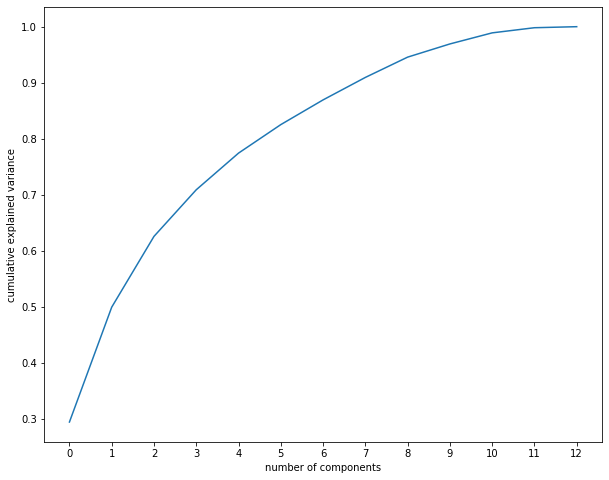

In [17]:
pca = PCA().fit(df_scaled)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(features)
plt.show()

Looking at the cumulative explained variance ratio, above about 5 features account for about 80% of the variance, so 5 is selected for the PCA model

In [18]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=5)

# Fit the PCA instance to the scaled samples
pca.fit(df_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_scaled)

# Print the shape of pca_features
print(pca_features.shape)



(6497, 5)


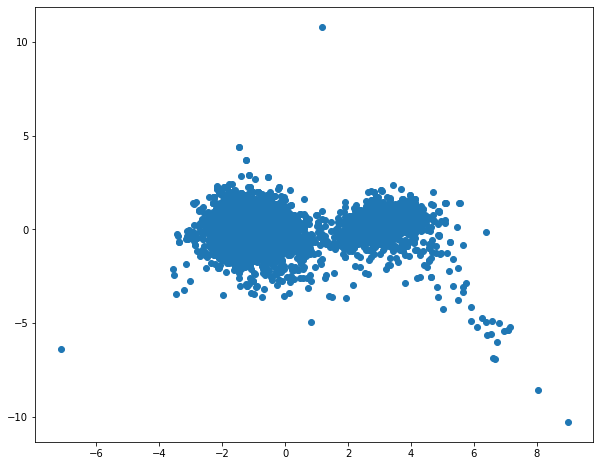

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(pca_features[:, 0], pca_features[:, 4])

I'm interested in segragating red and white wine so the number of clusters for KMeans testing is 2.

In [20]:
# Import KMeans


# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=2,random_state = 42)

# Fit model to points
model.fit(pca_features)

# Determine the cluster labels of new_points: labels
labels = model.labels_

# Print cluster labels of new_points
labels

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=2,random_state = 42)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(pca_features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'wine_color': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['wine_color'])

# Display ct
print(ct)

wine_color     0     1
labels                
0             18  1586
1           4880    13


The segration of red and white seems good with 1,599 red and 4,898 white.

In [22]:
model = KMeans(n_clusters=2)
model.fit(pca_features)
print(model.inertia_)


43927.727553639066


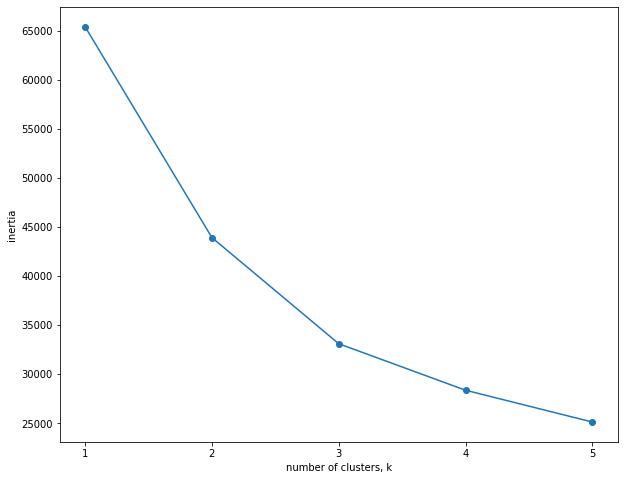

In [23]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state = 42)
    
    # Fit model to samples
    model.fit(pca_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The inertia is high at 2, but I'm only trying to distingish between two. 